In [450]:
#LIBRERIAS
#numericos y datos
import pandas as pd
import numpy as np
from sklearn import preprocessing
#graficos
import matplotlib.pyplot as plt
import seaborn as sns #estilos
# machine y deep learning 
import tensorflow as tf
import keras
import sklearn
#otras librerias
import statistics
from sklearn import mixture
from sklearn import datasets
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [451]:
dataset= pd.read_csv("/content/dataset_cereal.csv")
dataset.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [452]:
dataset.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


¿Qué variables hay?
las variables que se tienen hacen parte de las caracteristicas alimenticias, marca, raciones por tazas, así como estrategias de marketing como lo es la ubicación del producto en el estante de la tienda. 

los nombres de las variables son:
name	mfr	type	calories	protein	fat	sodium	fiber	carbo	sugars	potass	vitamins	shelf	weight	cups rating

¿Qué tipos de datos hay en las columnas? 

In [453]:
print("los tipos de datos son: ")
dataset.dtypes


los tipos de datos son: 


name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object






¿cuales podrían ser features y cuál podría ser target?

Features:
name	mfr	type	calories	protein	fat	sodium	fiber	carbo	sugars	potass	vitamins	shelf	weight	cups

Target:
rating

Se procede a eliminar columnas la de las cuales sus datos son iguales en un porcentaje superior al 80%, realiando el análisis de detalla que las filas a eliminar son:

Type
Vitamins
weight

In [454]:
#Renombre de la columna SalesPrice a Target
dataset=dataset.rename(columns={"rating":"target"})

#Eliminado de Columnas
dataset=dataset.drop(["type","vitamins","weight"], axis="columns")
dataset

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,target
0,100% Bran,N,70,4,1,130,10.0,5.0,6,280,3,0.33,68.402973
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8,135,3,1.00,33.983679
2,All-Bran,K,70,4,1,260,9.0,7.0,5,320,3,0.33,59.425505
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,3,0.50,93.704912
4,Almond Delight,R,110,2,2,200,1.0,14.0,8,-1,3,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,2,1,250,0.0,21.0,3,60,3,0.75,39.106174
73,Trix,G,110,1,1,140,0.0,13.0,12,25,2,1.00,27.753301
74,Wheat Chex,R,100,3,1,230,3.0,17.0,3,115,1,0.67,49.787445
75,Wheaties,G,100,3,1,200,3.0,17.0,3,110,1,1.00,51.592193


In [455]:
#convertir flotantes a enteros
dataset.target=dataset.target.astype(int)
dataset.fiber=dataset.fiber.astype(int)
dataset.carbo=dataset.carbo.astype(int)
dataset.cups=dataset.cups.astype(int)


In [456]:
#convertir string a int
cod=preprocessing.LabelEncoder()
dataset["name"] = cod.fit_transform(dataset["name"])
dataset["mfr"] = cod.fit_transform(dataset["mfr"])

In [457]:
#%matplotlib inline
#grafico agrupado resumen dataset
#sns.set()
#sns.set_palette("Set1")
#sns.pairplot(dataset, hue="target")

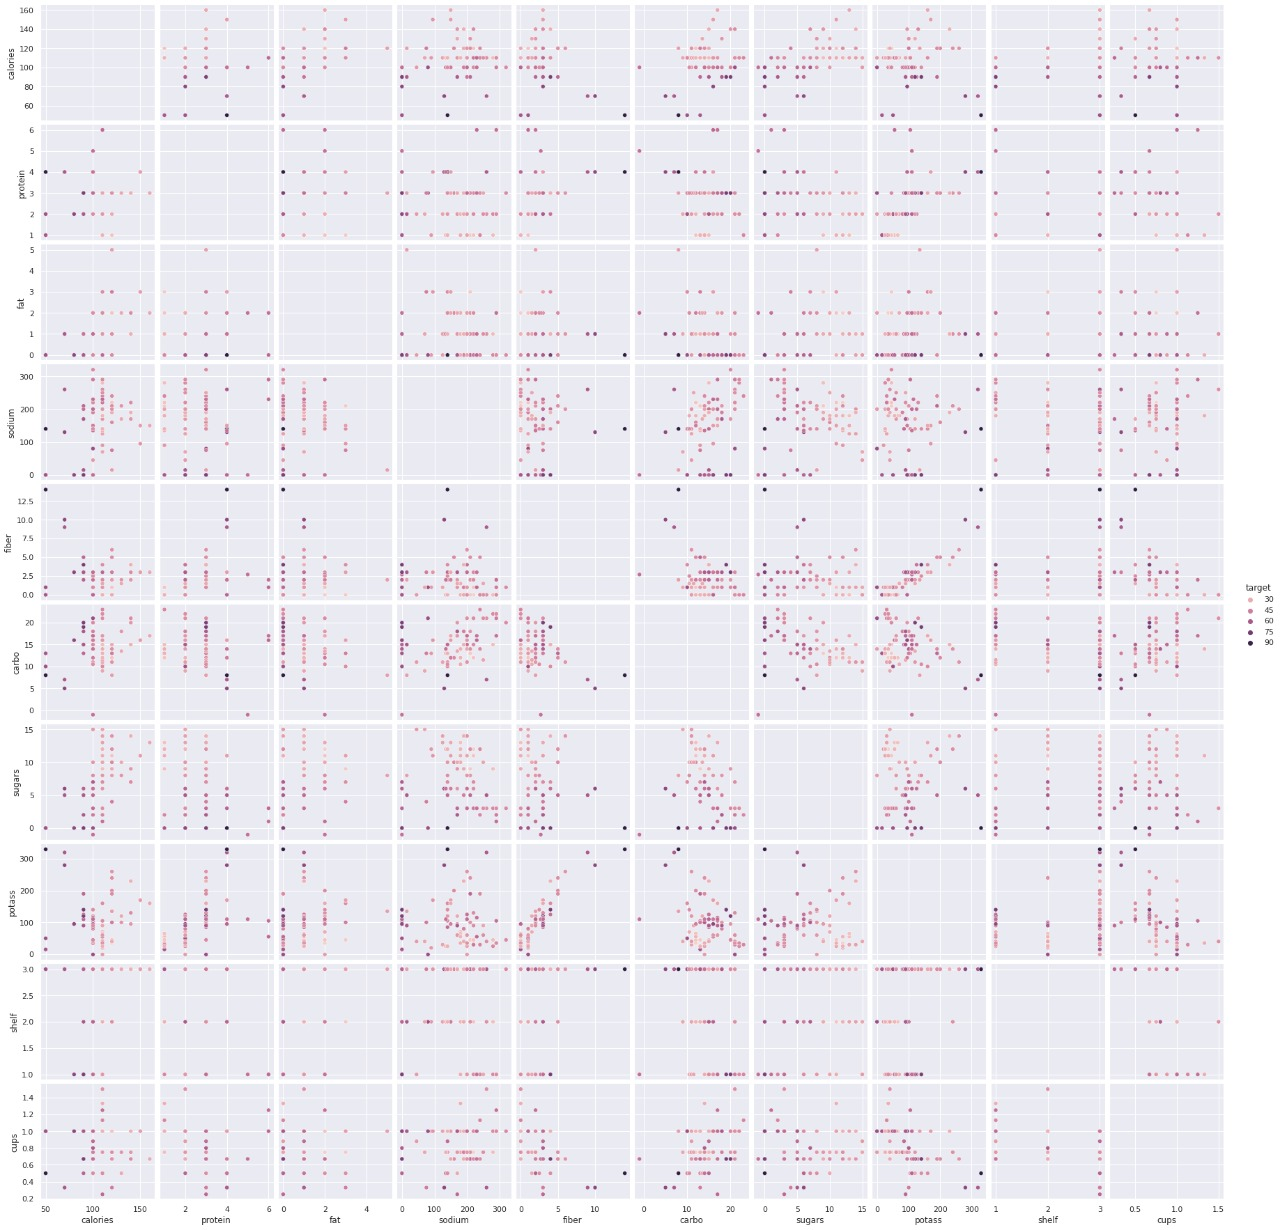



En el gáfico se pueden observar que las diferentes relaciones entre los features y el target permiten realizar una agrupación lo que permite clasificar los cereales.



In [458]:
 dataset.shape

(77, 13)

In [459]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(dataset, train_size=0.35 , shuffle = 0.65)
print(dataset_train.shape) # Dataset X (features) Dataset Y (target)
print(dataset_test.shape) 
dataset_train

(26, 13)
(51, 13)


,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups,target
11,11,1,110,6,2,290,2,17,1,105,1,1,50
19,19,2,110,3,3,140,4,10,7,160,3,0,40
41,41,5,100,4,2,150,2,12,6,95,2,0,45
16,16,2,100,2,0,290,1,21,2,35,1,1,45
57,57,5,100,5,2,0,2,-1,-1,110,1,0,50
2,2,2,70,4,1,260,9,7,5,320,3,0,59
10,10,5,120,1,2,220,0,12,12,35,2,0,18
6,6,2,110,2,0,125,1,11,14,30,2,1,33
49,49,2,140,3,2,220,3,21,7,130,3,0,40
34,34,4,120,3,3,75,3,13,4,100,3,0,45


In [460]:
#separar features de los targets
#Cuando el dataset tenga la etiqueta X, son features (Caracteristicas)
#Cuando el dataset tenga la etiqueta Y, es el target (Objetivo)
dataset_train_X = dataset_train.drop("target", axis="columns") # .drop Eliminar una fila o una columna (en este caso elimina una columna)
dataset_train_Y = dataset_train["target"] #solo el target

dataset_test_X = dataset_test.drop("target", axis="columns") # Eliminar 
dataset_test_Y = dataset_test["target"] #solo el target

print(dataset_train_X.shape) #Solo Features
print(dataset_train_Y.shape) #Solo Target 

print(dataset_test_X.shape) #Solo Features
print(dataset_test_Y.shape) #Solo Target 

(26, 12)
(26,)
(51, 12)
(51,)


In [461]:
#importamos el modelo a usar
from sklearn.naive_bayes import GaussianNB

#Crear el modelo

model = GaussianNB() #instancia del modelo


# Entrenar el modelo
# La funcion fit entrena modelos en sklearn
# model.fit(features_train, target_train)
model.fit(dataset_train_X, dataset_train_Y)

GaussianNB()

In [462]:
# Probar el modelo ya entrenado
inference = model.predict(dataset_test_X ) #model.predict obtener datos entrenados

#comprobar la respuesta del modelo
print(inference)

[45 68 39 39 45 45 68 45 59 39 45 59 39 39 45 59 45 45 39 45 39 45 39 45
 39 45 59 45 45 39 45 45 45 45 45 59 45 45 45 39 45 45 39 45 59 39 45 39
 45 45 39]


In [463]:
# Metricas de comprobacion (Saber si las respuestas estan bien o no)
# Metrica del rendimiento del modelo (Testing)

from sklearn.metrics import accuracy_score #puntaje de exactitud

model_accurracy = accuracy_score(dataset_test_Y, inference) #toma las respuestas correctas de nuestro modelo y luego la inferencia que es lo que el modelo predijo anteriormente
model_accurracy *= 100 #para dejarlo en modelos de porcentaje
print("La exactitud del modelo es: ", model_accurracy)
print ("El error del modelo es: ", 100-model_accurracy)

La exactitud del modelo es:  1.9607843137254901
El error del modelo es:  98.03921568627452


Algoritmo de Clasificacion por Aprendizaje Supervisado como es el Basado en Naive Bayes Gausiano (GBN), no es posible usarse debido a que este modelo es más adecuado para datos continuos ya que asume que los datos de entrada tienen una distribución de curva de Gauss (normal). Por esa razón el error es muy alto, en este caso es del 100%, para ellos se debe implementar otro modelo que ayude a mitigar este problema.

In [464]:
numeric_list=['name',	'mfr',	'calories',	'protein',	'fat',	'sodium',	'fiber',	'carbo',	'sugars',	'potass'	,	'shelf',	'cups']

In [465]:
numeric_transformer= Pipeline( steps= [ ('scaler', StandardScaler() ) ] )

In [466]:
#realizamos otro tipo de entrenamiento debido al alto tipo de error
X = dataset_train.drop("target", axis="columns") # .drop Eliminar una fila o una columna (en este caso elimina una columna)
Y = dataset_train["target"] #solo el target


In [467]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.35, shuffle = 0.65)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((9, 12), (17, 12), (9,), (17,))

In [468]:
transformer = ColumnTransformer ( [
    ('num',numeric_transformer,numeric_list)                            
])

In [469]:
def display_scores(scores):
  print('Scores:', scores)
  print('Mean:', scores.mean())
  print('Standard Desviation:', scores.std())

In [470]:
#ARBOL DE DESICIÓN
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=0)
model_tree_reg = Pipeline( steps= [
      ('transformer', transformer) ,
      ('tree_reg',tree_reg)
])
model_tree_reg.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['name', 'mfr', 'calories',
                                                   'protein', 'fat', 'sodium',
                                                   'fiber', 'carbo', 'sugars',
                                                   'potass', 'shelf',
                                                   'cups'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=0))])

In [471]:
from sklearn.model_selection import cross_val_score
tree_reg_scores = cross_val_score(model_tree_reg, X, Y,
                                  scoring= 'neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-tree_reg_scores)
display_scores(tree_rmse_scores)

Scores: [ 6.97614985 13.61371857  6.75771164 10.23067284 10.40833     4.3204938
  7.64852927  9.48683298 10.04987562  6.04152299]
Mean: 8.55338375513949
Standard Desviation: 2.563778397336478


In [472]:
# Probar el modelo ya entrenado
inference = model.predict(x_test) #model.predict obtener datos entrenados

#comprobar la respuesta del modelo
print(inference)

[74 45 40 53 33 59 30 51 60 34 59 45 68 39 30 50 31]


In [485]:
x_test

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,cups
64,64,3,90,3,0,0,4,19,0,140,1,0
16,16,2,100,2,0,290,1,21,2,35,1,1
49,49,2,140,3,2,220,3,21,7,130,3,0
9,9,4,90,3,0,210,5,13,5,190,3,0
6,6,2,110,2,0,125,1,11,14,30,2,1
2,2,2,70,4,1,260,9,7,5,320,3,0
59,59,1,100,3,2,140,2,10,8,140,3,0
75,75,1,100,3,1,200,3,17,3,110,1,1
54,54,5,50,1,0,0,0,13,0,15,3,1
45,45,6,150,4,3,150,3,16,11,170,3,1


In [473]:
# Metricas de comprobacion (Saber si las respuestas estan bien o no)
# Metrica del rendimiento del modelo (Testing)

from sklearn.metrics import accuracy_score #puntaje de exactitud

model_accurracy = accuracy_score(y_test, inference) #toma las respuestas correctas de nuestro modelo y luego la inferencia que es lo que el modelo predijo anteriormente
model_accurracy *= 100 #para dejarlo en modelos de porcentaje
print("La exactitud del modelo es: ", model_accurracy)
print ("El error del modelo es: ", 100-model_accurracy)

La exactitud del modelo es:  94.11764705882352
El error del modelo es:  5.882352941176478


al modelo de arbol de Desicion permite la construcción de modelos predictivos de analítica de datos para el Big Data basados en su clasificación según ciertas características o propiedades, o en la regresión mediante la relación entre distintas variables para predecir el valor de otra, esto permite que se pueda plantear el problema desde distintas perspectivas de acción y analizar de manera completa todas las posibles soluciones, como resultado podemos observar un error del 5% mejorando en gran medida el anterior modelo (Naive Bayes Gausiano (GBN)), ya con esto se puede empezar a trabajar en las predicciones requeridas.


In [497]:
dataset_validation = dataset_test_X
dataset_validation = dataset_validation[1:2]
dataset_validation["name"] = 77
dataset_validation["mfr"] = 2
dataset_validation["calories"] = 125
dataset_validation["protein"] = 1
dataset_validation["fat"] = 1
dataset_validation["fiber	"] = 1.0
dataset_validation["sodium"] = 12
dataset_validation["carbo"] = 14.0
dataset_validation["sugars"] = 23
dataset_validation["potass"] = 25
dataset_validation["shelf"] = 1
dataset_validation["cups"] = 0.75


dataset_validation=dataset_validation.drop(["type","vitamins","weight","fiber\t"], axis="columns")




El modelo responde que es:  [45]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [498]:
# Probar el modelo ya entrenado
inference = model.predict(dataset_validation) #model.predict obtener datos entrenados

#comprobar la respuesta del modelo
print("El modelo responde que es: ", inference)

El modelo responde que es:  [45]
